In [4]:
from model.model4 import Model4,build_model4
from model.utils import get_model, save_checkpoint, load_checkpoint
from PIL import Image
import yaml
import numpy as np
img = Image.open(r"D:\\Thesis\\DamnShit\\module_space\\testimg\\1.jpg") 
img=img.convert("RGB")
def yaml_to_dict(path: str):
    with open(path) as f:
        return yaml.load(f.read(), yaml.FullLoader)
config = yaml_to_dict(".\\configs\\train_mot17_coco.yaml")
config["DATA_ROOT"]="D:\\Thesis\\DamnShit\\Hello\\MeMOTR_IKUN\\DATA_DIR"
config["TRAIN_COCO"]="D:\\Thesis\\DamnShit\\Hello\\MeMOTR_IKUN\\outputs\\memotr_mot17_coco\\train\\mot17_train_coco_reforged.json"
config["NO_TRANSFORM"]=True
config["EPOCHS"]=10
config["RESUME"]="D:\\Thesis\\DamnShit\\module_space\\checkpoint_9.pth"

model = build_model4(config=config)
train_states = {
        "start_epoch": 0,
        "global_iters": 0
    }

# Resume
if config["RESUME"] is not None:
    load_checkpoint(model=model, path=config["RESUME"])


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
sentences=["woman in black pant"]
x=[{
    "local_images":[img],
    "sentences":sentences
}]

In [19]:
model.eval()
out=model(x)


tensor(0., device='cuda:0')
tensor(-0.)
-0.0


In [ ]:
# from model.criterion import ModuleCriterion

In [ ]:
# ModuleCriterion.get_cross_image_text_loss()

-6.6221714
['woman in black pain']


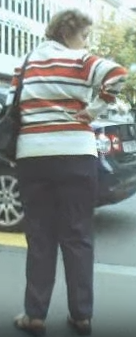

In [16]:
logits = out["logits"]
for i in range(len(logits)):
    temp = logits[i].cpu().numpy()
    print(temp[0][0])
    print(sentences)
img